In [1]:
#importing of libraries, packages and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

#sklearn and scikit
from sklearn import cluster
from sklearn import metrics 
from sklearn.preprocessing import scale 
from sklearn.preprocessing import LabelEncoder 
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [3]:
#use to save file as a dataframe in python for use in analysis
raw_ps = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\MSc Quantitative Finance\\S1.CS982 - Big Data Technologies\\Datasets\\google-play-store-apps\\googleplaystore.csv')

In [4]:
#information on dataset: observations columns datatypes
raw_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#check to see if there is any missing data in each column. output the sum of all missing values in each colum
raw_ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#drop misaligned row
raw_ps2 = raw_ps.drop(10472)

In [7]:
#drop all remove rows in that have 'varies with device' in each column
raw_ps2 = raw_ps2[raw_ps2.Size != 'Varies with device']

In [8]:
#info on dataset
raw_ps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
App               9145 non-null object
Category          9145 non-null object
Rating            7729 non-null float64
Reviews           9145 non-null object
Size              9145 non-null object
Installs          9145 non-null object
Type              9145 non-null object
Price             9145 non-null object
Content Rating    9145 non-null object
Genres            9145 non-null object
Last Updated      9145 non-null object
Current Ver       9137 non-null object
Android Ver       9143 non-null object
dtypes: float64(1), object(12)
memory usage: 1000.2+ KB


In [9]:
#info on data type in each column
raw_ps2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
#stripping of characters to change values in each to numeric values later on
raw_ps2['Price'] = raw_ps2['Price'].map(lambda x: x.lstrip('$'))
raw_ps2['Size'] = raw_ps2['Size'].map(lambda x: x.rstrip('M'))
raw_ps2['Installs'] = raw_ps2['Installs'].map(lambda x: x.rstrip('+'))
raw_ps2['Installs'] = raw_ps2['Installs'].map(lambda x: x.replace(',', ''))

In [11]:
#stripping all data values with 'k' and transforming from kilobytes to megabytes
for index, row in raw_ps2['Size'].iteritems():
    if 'k' in row:
        row = float(row.rstrip('k'))/1024
        raw_ps2['Size'].at[index] = row

In [13]:
#changing columns to numeric data types
raw_ps2 = raw_ps2.astype({'Reviews': 'int64', 'Price': 'float64', 'Size': 'float64', 'Installs': 'int64'})

In [14]:
raw_ps2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9145 entries, 0 to 10840
Data columns (total 13 columns):
App               9145 non-null object
Category          9145 non-null object
Rating            7729 non-null float64
Reviews           9145 non-null int64
Size              9145 non-null float64
Installs          9145 non-null int64
Type              9145 non-null object
Price             9145 non-null float64
Content Rating    9145 non-null object
Genres            9145 non-null object
Last Updated      9145 non-null object
Current Ver       9137 non-null object
Android Ver       9143 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1000.2+ KB


In [15]:
#check to see if there is still missing data in each column. output the sum of all missing values in each colum
raw_ps2.isnull().sum()

App                  0
Category             0
Rating            1416
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
#check to see if there is any missing data in each column. output the sum of all missing values in each colum
raw_ps2.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [17]:
#check to see if there is any missing data in each column. output the sum of all missing values in each colum
raw_ps2.isnull().any().any()

True

In [18]:
#drop all rows with missing values
playstore = raw_ps2.dropna()

In [19]:
#check to see if there is any missing data in each column
playstore.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [20]:
#info on data set
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
App               7723 non-null object
Category          7723 non-null object
Rating            7723 non-null float64
Reviews           7723 non-null int64
Size              7723 non-null float64
Installs          7723 non-null int64
Type              7723 non-null object
Price             7723 non-null float64
Content Rating    7723 non-null object
Genres            7723 non-null object
Last Updated      7723 non-null object
Current Ver       7723 non-null object
Android Ver       7723 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


In [21]:
#observation of dataframe rows and columns
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


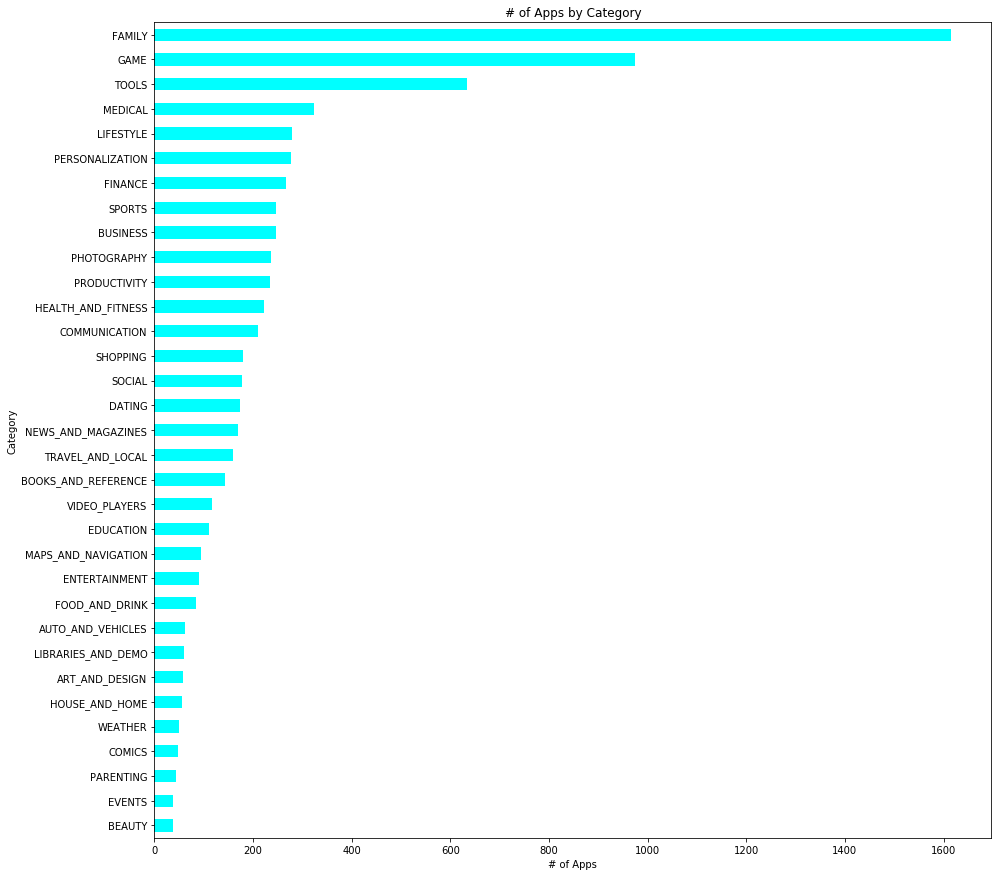

In [22]:
#Display chart of the number of apps in each category
figure(figsize=(15,15))
playstore['Category'].value_counts().sort_values().plot.barh(color = 'cyan')
plt.title('# of Apps by Category')
plt.xlabel('# of Apps')
plt.ylabel('Category')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\numofapps.png', bbox_inches='tight')
plt.show()

In [23]:
#create a data frame of number of apps in each category
numapps = playstore['Category'].value_counts().sort_values(ascending = False)
numapps =numapps.rename_axis('Category').reset_index(name='# of Apps')

In [24]:
numapps

,Category,# of Apps
0,FAMILY,1616
1,GAME,974
2,TOOLS,633
3,MEDICAL,324
4,LIFESTYLE,280
5,PERSONALIZATION,278
6,FINANCE,266
7,SPORTS,247
8,BUSINESS,246
9,PHOTOGRAPHY,236


In [25]:
#observe data type in numapps dataframe
numapps.dtypes

Category     object
# of Apps     int64
dtype: object

In [26]:
#append new column to numapps datafram which percentage of apps in each category
numapps['% of Total'] = round(numapps['# of Apps']/sum(numapps['# of Apps']) *100, 2)
numapps

,Category,# of Apps,% of Total
0,FAMILY,1616,20.92
1,GAME,974,12.61
2,TOOLS,633,8.20
3,MEDICAL,324,4.20
4,LIFESTYLE,280,3.63
5,PERSONALIZATION,278,3.60
6,FINANCE,266,3.44
7,SPORTS,247,3.20
8,BUSINESS,246,3.19
9,PHOTOGRAPHY,236,3.06


In [27]:
#save numapps to desktop
numapps.to_csv(r'C:\\Users\\Inno Mvula\\Desktop\\numapps.csv')

In [28]:
#correlation matrix
corr = playstore[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr()

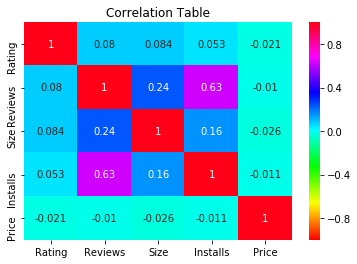

In [29]:
#observe relationships between desired variables in the form of a heatmap and save to desktop
ax = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'hsv')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Table')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\correlation table.png', bbox_inches='tight')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

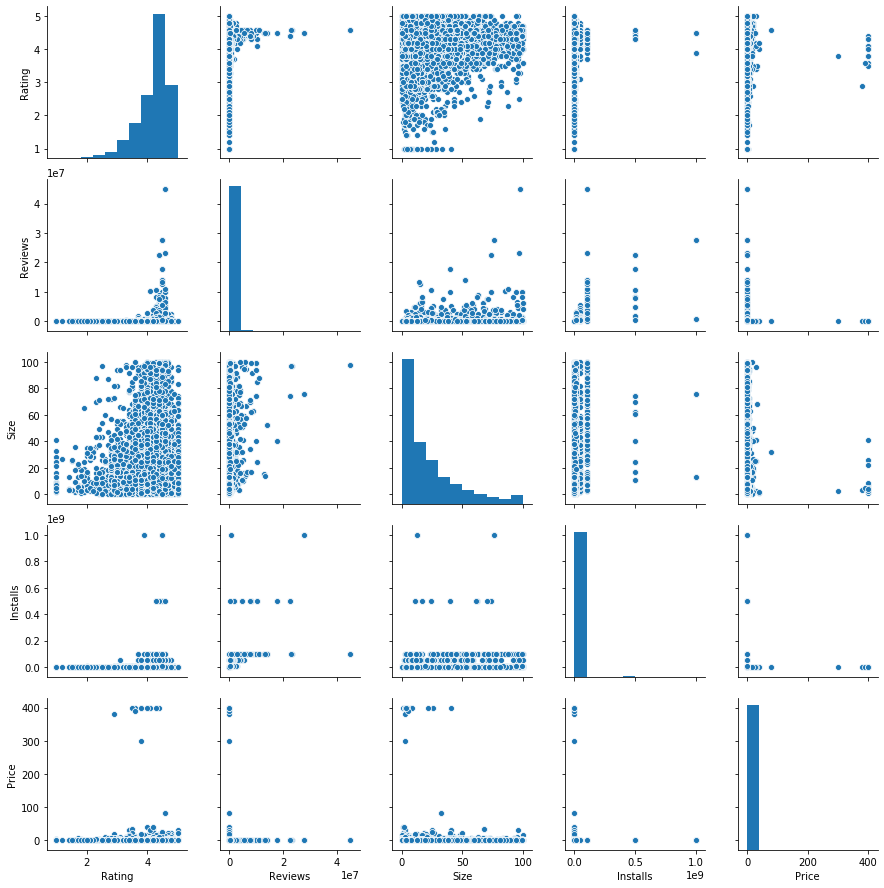

In [32]:
#correlogram
sns.pairplot(playstore[['Rating', 'Reviews', 'Size', 'Installs', 'Price']], palette="Set2")
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\correlogram.png', bbox_inches='tight')
plt.show

In [31]:
#function prints out a chart of the average of a desired factor by category. input is a desired factor/variable and output is the average across the different categories
def factoravg(factor):
    if factor in playstore.columns:
        figure(figsize=(10,10))
        ax4 = playstore.groupby('Category')[factor].mean().sort_values().plot.barh( color = 'cyan')
        totals = []
        for i in ax4.patches:
            totals.append(i.get_width())
        for i in ax4.patches:
            whole = ['Reviews', 'Installs']
            if factor in whole:
                ax4.text(i.get_width() - 0.2, i.get_y()+.15, str(round(i.get_width())), fontsize=10, color='black')
            else:
                ax4.text(i.get_width(), i.get_y()+.15, str(round(i.get_width(), 2)), fontsize=10, color='black')    
        plt.title('Average' + ' ' + factor)
        plt.xlabel(factor)
        plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\factoravg.png', bbox_inches='tight')
        plt.show()

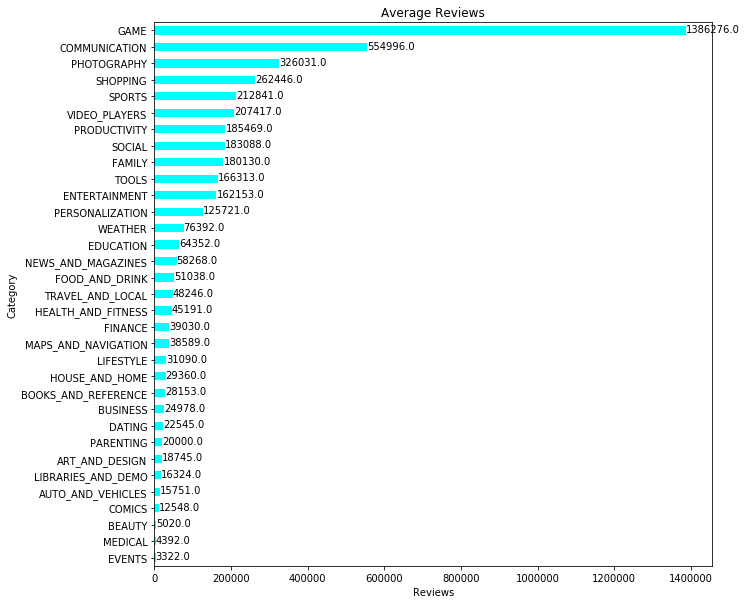

In [32]:
factoravg('Reviews')

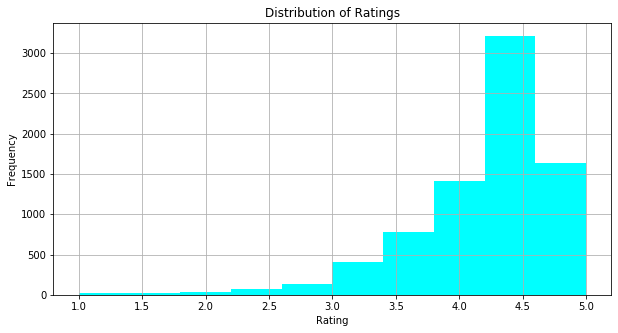

In [33]:
#code outputs a histogram displaying the distribution ratings across the dataframe
figure(figsize=(10,5))
playstore['Rating'].hist(color='cyan')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Distribution Rating.png', bbox_inches='tight')
plt.show()

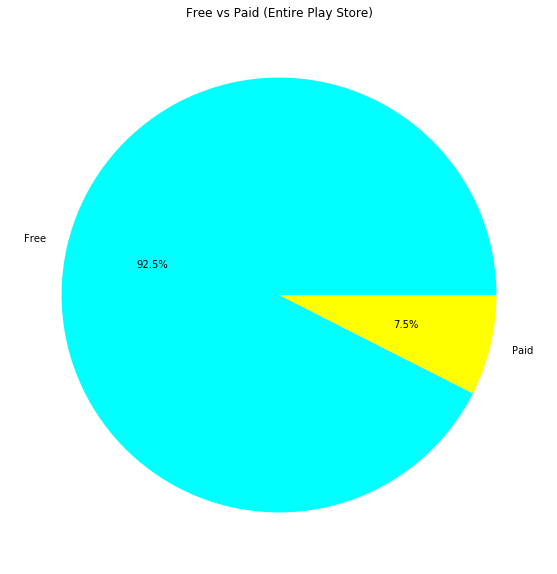

In [34]:
#outputs a pie chart showing the percent of apps that are free vs paid
figure(figsize=(10,10))
playstore['Type'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['cyan', 'yellow'])
plt.title('Free vs Paid (Entire Play Store)')
plt.ylabel('')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Total Free vs Paid.png', bbox_inches='tight')
plt.show()

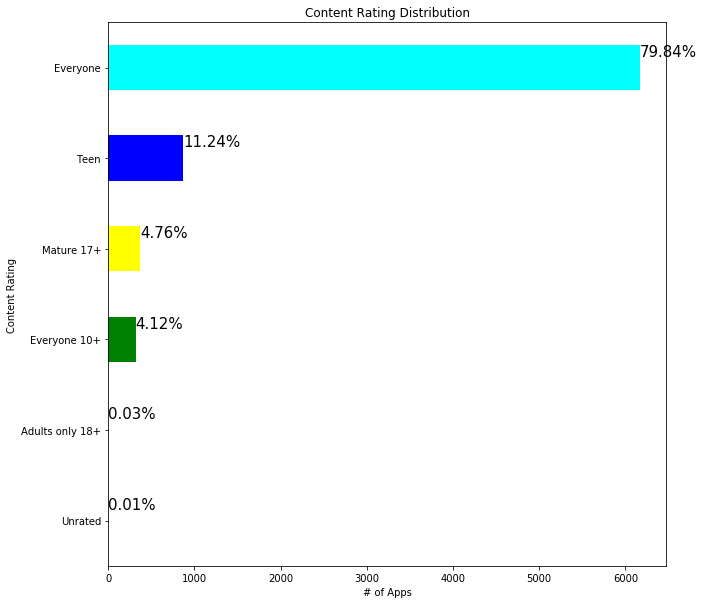

In [35]:
#outputs a horizontal bar chart showing the distribution of content rating across the entire dataframe
figure(figsize=(10,10))
ax3 = playstore['Content Rating'].value_counts().sort_values().plot.barh(color=['blue','cyan',  'green', 'yellow'])
totals = []
for i in ax3.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax3.patches:
    ax3.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='black')
plt.title('Content Rating Distribution')
plt.ylabel('Content Rating')
plt.xlabel('# of Apps')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Content Rating Distribution.png', bbox_inches='tight')
plt.show()

In [36]:
#encoding of category and content rating columns for use in regression and clustering
playstore["Content Rating NUM"] = LabelEncoder().fit_transform(playstore["Content Rating"])
playstore["Category NUM"] = LabelEncoder().fit_transform(playstore["Category"])
playstore["Type NUM"] = LabelEncoder().fit_transform(playstore["Type"])

C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be s

In [37]:
playstore['Content Rating NUM'].unique()
#Adults only 18+ = 0
#Everyone = 1
#Everyone 10+ = 2
#Mature 17+ = 3
#Teen = 4
#unrated = 5


array([1, 4, 2, 3, 0, 5], dtype=int64)

In [38]:
playstore['Category NUM'].unique()

#ART_AND_DESIGN = 0
#AUTO_AND_VEHICLES = 1
#BEAUTY = 2 
#BOOKS_AND_REFERENCE = 3
#BUSINESS = 4
#COMICS = 5
#COMMUNICATION = 6
#DATING = 7
#EDUCATION = 8
#ENTERTAINMENT = 9
#EVENTS = 10
#FAMILY = 11
#FINANCE = 12
#FOOD_AND_DRINK = 13
#GAME = 14
#HEALTH_AND_FITNESS = 15
#HOUSE_AND_HOME = 16
#LIBRARIES_AND_DEMO = 17
#LIFESTYLE = 18
#MAPS_AND_NAVIGATION = 19
#MEDICAL = 20
#NEWS_AND_MAGAZINES = 21
#PARENTING = 22
#PERSONALIZATION = 23
#PHOTOGRAPHY = 24
#PRODUCTIVITY = 25
#SHOPPING = 26
#SOCIAL = 27
#SPORTS = 28
#TOOLS = 29
#TRAVEL_AND_LOCAL = 30
#VIDEO_PLAYERS = 31
#WEATHER = 32

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19],
      dtype=int64)

In [39]:
playstore['Type NUM'].unique()
#Free = 0
#Paid = 1

array([0, 1], dtype=int64)

In [40]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Content Rating NUM,Category NUM,Type NUM
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0


In [41]:
#changing the desired columns data types to numeric values
playstore = playstore.astype({'Category NUM': 'int64', 'Content Rating NUM': 'int64', 'Type NUM': 'int64'})

In [42]:
playstore.dtypes

App                    object
Category               object
Rating                float64
Reviews                 int64
Size                  float64
Installs                int64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Last Updated           object
Current Ver            object
Android Ver            object
Content Rating NUM      int64
Category NUM            int64
Type NUM                int64
dtype: object

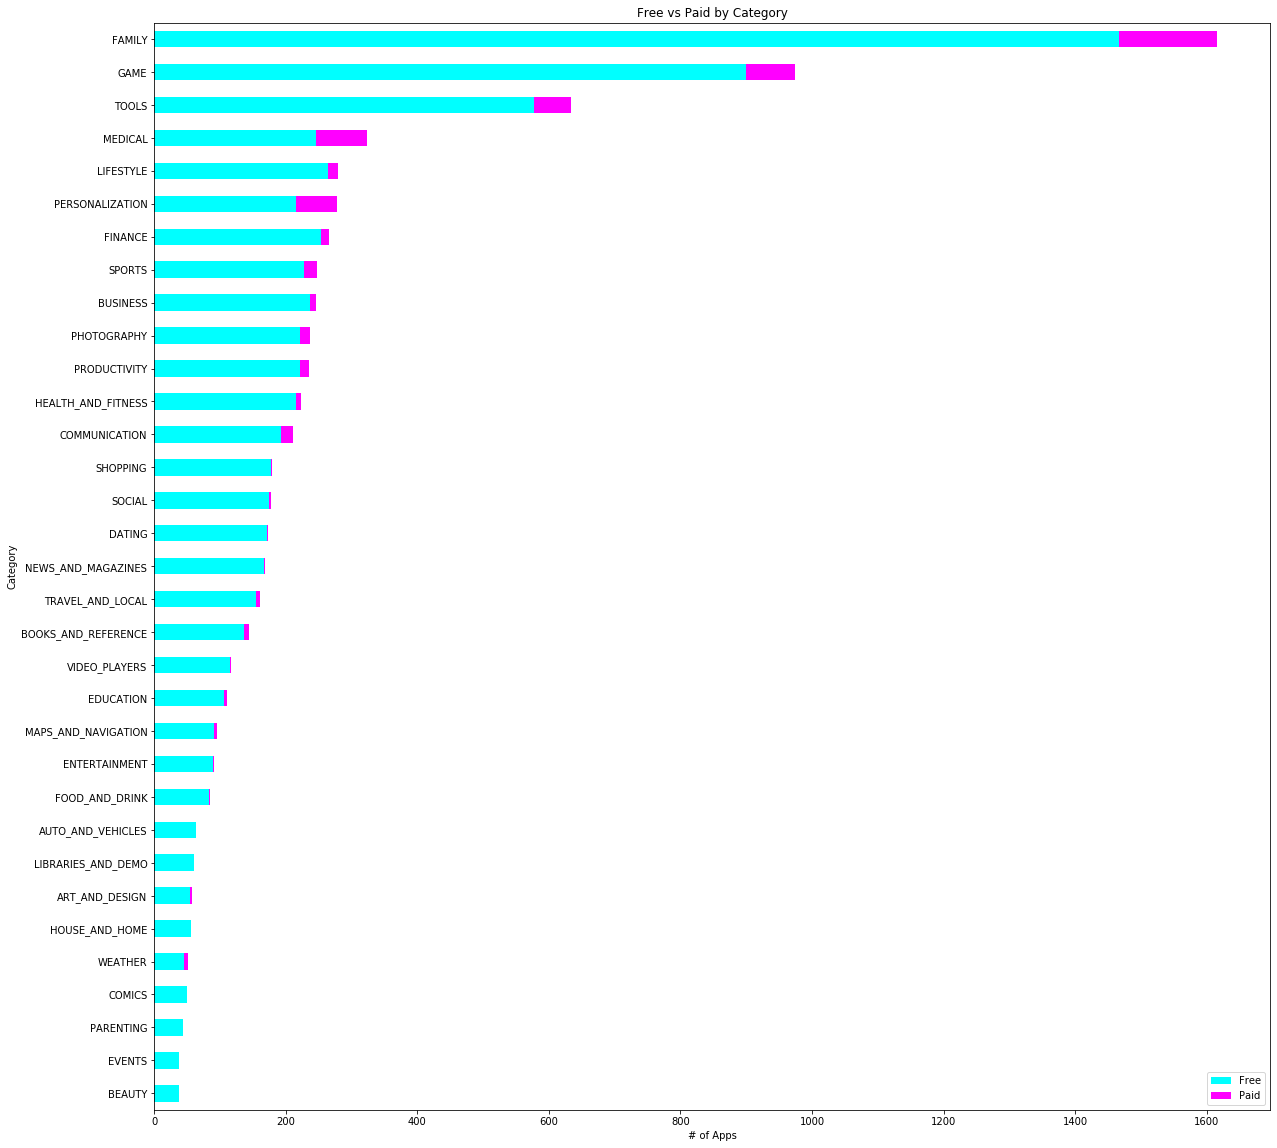

In [43]:
#outputs a horizontal bar chart showing the number of free vs paid apps by category
freepaid = playstore.groupby('Category')['Type'].value_counts()
type_sort = freepaid.groupby(level=[0]).sum().sort_values(ascending=True)
freepaid.reindex(index=type_sort.index, level=0).unstack().plot.barh(stacked=True, cmap='cool')
plt.title('Free vs Paid by Category')
plt.ylabel('Category')
plt.xlabel('# of Apps')
plt.legend(loc = 'lower right')
plt.gcf().set_size_inches(20, 20)
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Free vs Paid.png', bbox_inches='tight')
plt.show()

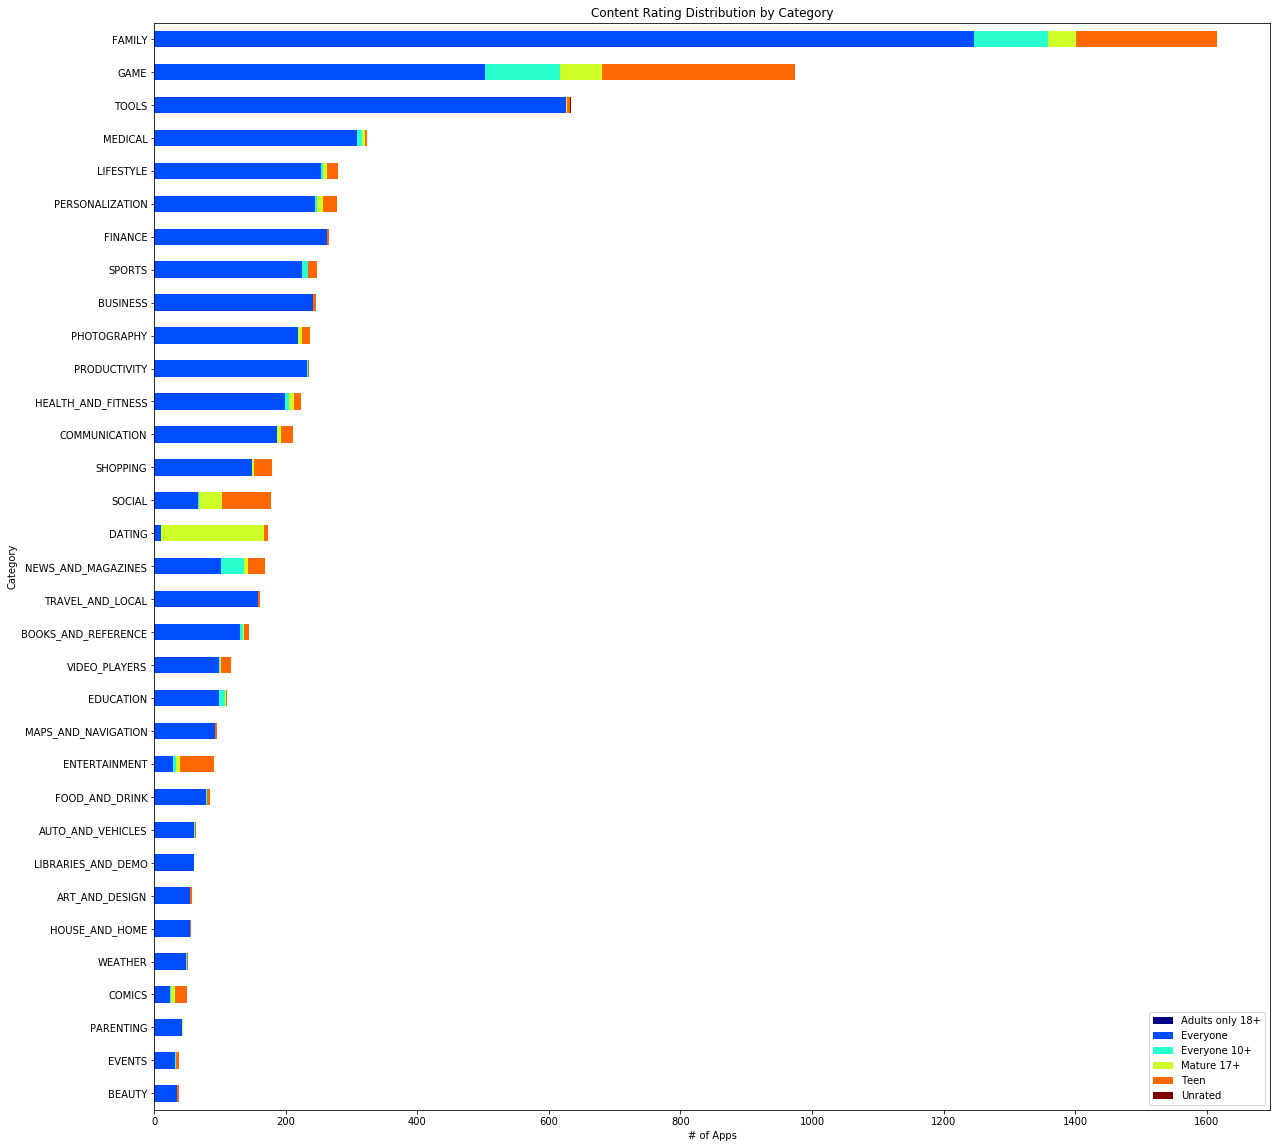

In [44]:
#outputs a horizontal bar chart showing the amount of apps according to content rating by category
contrate = playstore.groupby('Category')['Content Rating'].value_counts()
type_sort = contrate.groupby(level=[0]).sum().sort_values(ascending=True)
contrate.reindex(index=type_sort.index, level=0).unstack().plot.barh(stacked=True, cmap='jet')
plt.title('Content Rating Distribution by Category')
plt.ylabel('Category')
plt.xlabel('# of Apps')
plt.legend(loc = 'lower right')
plt.gcf().set_size_inches(20, 20)
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Content Rating Distribution.png', bbox_inches='tight')
plt.show()

In [45]:
#outputs all genres in the game category and their values
game_genres = playstore.groupby('Category').get_group('GAME')['Genres']
playstore.groupby('Category').get_group('GAME')['Genres'].value_counts()

Action                           322
Arcade                           186
Racing                            83
Adventure                         68
Card                              39
Board                             38
Casual                            35
Puzzle                            33
Casino                            32
Trivia                            27
Word                              24
Strategy                          22
Role Playing                      15
Music                             15
Sports                            14
Simulation                         9
Adventure;Action & Adventure       5
Action;Action & Adventure          2
Casual;Pretend Play                1
Casual;Brain Games                 1
Simulation;Action & Adventure      1
Simulation;Education               1
Casual;Creativity                  1
Name: Genres, dtype: int64

In [46]:
#this code appends all apps that are multiple genres and adds their value to the individual genres they fall under. 
#for example adventure; action & adventure. This falls under adventure and another genre called action & adventure so we add this to action and create a new genre action & adventure
#output is a dictionary
genre_list = list(game_genres)
ggenres = {}
for genre in genre_list:
    if ';' in genre:
        genre2 = genre.split(';')
        for gen in genre2:
            if gen not in ggenres:
                ggenres[gen] = 1
            else:
                ggenres[gen] += 1
    else:
        if genre not in ggenres:
            ggenres[genre] = 1
        else:
            ggenres[genre] += 1
print(ggenres)

{'Adventure': 73, 'Action & Adventure': 8, 'Arcade': 186, 'Casual': 38, 'Card': 39, 'Pretend Play': 1, 'Strategy': 22, 'Action': 324, 'Puzzle': 33, 'Sports': 14, 'Word': 24, 'Racing': 83, 'Creativity': 1, 'Simulation': 11, 'Board': 38, 'Trivia': 27, 'Role Playing': 15, 'Education': 1, 'Brain Games': 1, 'Music': 15, 'Casino': 32}


In [47]:
#create a datafram from the dictionary ggenres for easier manipulation and visualization
gdf = pd.DataFrame(ggenres.items(), columns=["Genre", "# of Apps"])
gdf

,Genre,# of Apps
0,Adventure,73
1,Action & Adventure,8
2,Arcade,186
3,Casual,38
4,Card,39
5,Pretend Play,1
6,Strategy,22
7,Action,324
8,Puzzle,33
9,Sports,14


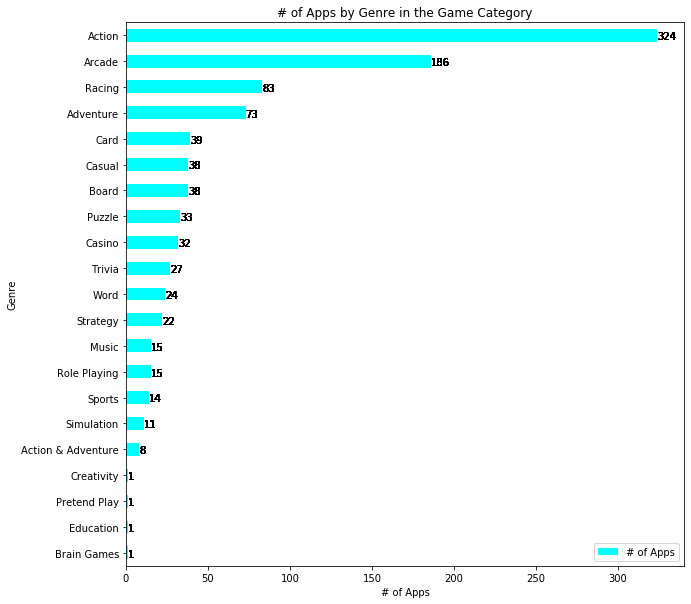

In [48]:
#ouputs a horizontal bar chart depiciting the number of apps by genre in the game category
ax5 = gdf.sort_values(by = '# of Apps').plot.barh('Genre', '# of Apps', color = 'cyan')
totals = []
for i in ax5.patches:
    totals.append(i.get_width())
    for i in ax5.patches:
        ax5.text(i.get_width(), i.get_y()+.10, str(round(i.get_width(), 2)), fontsize=10, color='black')    
        plt.title('# of Apps by Genre in the Game Category')
        plt.xlabel('# of Apps')
        plt.gcf().set_size_inches(10, 10)
        plt.legend(loc = 'lower right')
        
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Genre distribution in the game category.png', bbox_inches='tight')
plt.show()


In [49]:
#outputs all genres in the game category and their values
fam_genres = playstore.groupby('Category').get_group('FAMILY')['Genres']
playstore.groupby('Category').get_group('FAMILY')['Genres'].value_counts()

Entertainment                          367
Education                              325
Simulation                             173
Casual                                 125
Role Playing                            88
                                      ... 
Role Playing;Brain Games                 1
Puzzle;Education                         1
Music & Audio;Music & Video              1
Board;Pretend Play                       1
Health & Fitness;Action & Adventure      1
Name: Genres, Length: 66, dtype: int64

In [50]:
#this code appends all apps that are multiple genres and adds their value to the individual genres they fall under. 
#for example adventure; action & adventure. This falls under adventure and another genre called action & adventure so we add this to action and create a new genre action & adventure
fgenre_list = list(fam_genres)
fgenres = {}
for genre in fgenre_list:
    if ';' in genre:
        genre2 = genre.split(';')
        for gen in genre2:
            if gen not in fgenres:
                fgenres[gen] = 1
            else:
                fgenres[gen] += 1
    else:
        if genre not in fgenres:
            fgenres[genre] = 1
        else:
            fgenres[genre] += 1
print(fgenres)

{'Casual': 192, 'Brain Games': 57, 'Adventure': 11, 'Action & Adventure': 106, 'Educational': 97, 'Creativity': 21, 'Puzzle': 100, 'Education': 462, 'Card': 3, 'Pretend Play': 79, 'Simulation': 188, 'Art & Design': 2, 'Entertainment': 388, 'Music': 3, 'Music & Video': 19, 'Arcade': 14, 'Action': 14, 'Racing': 15, 'Role Playing': 99, 'Strategy': 78, 'Music & Audio': 1, 'Health & Fitness': 2, 'Board': 18, 'Video Players & Editors': 2, 'Sports': 2, 'Books & Reference': 2}


In [51]:
#create a datafram from the dictionary fgenres for easier manipulation and visualization
fdf = pd.DataFrame(fgenres.items(), columns=["Genre", "# of Apps"])
fdf

,Genre,# of Apps
0,Casual,192
1,Brain Games,57
2,Adventure,11
3,Action & Adventure,106
4,Educational,97
5,Creativity,21
6,Puzzle,100
7,Education,462
8,Card,3
9,Pretend Play,79


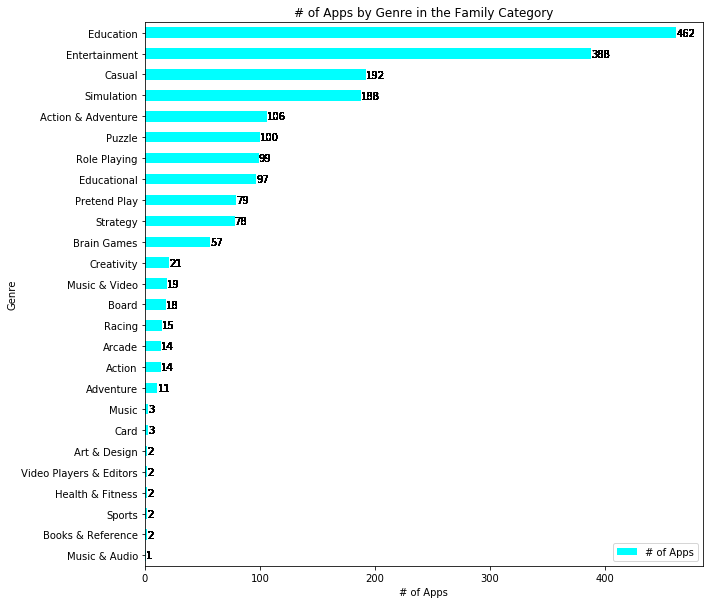

In [52]:
#ouputs a horizontal bar chart depiciting the number of apps by genre in the family category
ax6 = fdf.sort_values(by = '# of Apps').plot.barh('Genre', '# of Apps', color = 'cyan')
totals = []
for i in ax6.patches:
    totals.append(i.get_width())
    for i in ax6.patches:
        ax6.text(i.get_width(), i.get_y()+.10, str(round(i.get_width(), 2)), fontsize=10, color='black')    
        plt.title('# of Apps by Genre in the Family Category')
        plt.xlabel('# of Apps')
        plt.gcf().set_size_inches(10, 10)
        plt.legend(loc = 'lower right')
        
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Genre distribution in the family category.png', bbox_inches='tight')
plt.show()


In [53]:
#switiching columns with each other
playstore = playstore[['App', 'Category', 'Category NUM', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating NUM', 'Content Rating', 'Type', 'Type NUM', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']]

In [54]:
playstore.dtypes

App                    object
Category               object
Category NUM            int64
Rating                float64
Reviews                 int64
Size                  float64
Installs                int64
Price                 float64
Content Rating NUM      int64
Content Rating         object
Type                   object
Type NUM                int64
Genres                 object
Last Updated           object
Current Ver            object
Android Ver            object
dtype: object

In [56]:
#split values between response variable (y) and explanatory variables (x)
x = playstore.values[:, 3:9]
y = playstore.values[:,2] 

In [57]:
#scaling explanatory variables
scaled_data = scale(x) 

In [58]:
n_samples, n_features = scaled_data.shape 
n_digits = len(np.unique(y)) 
model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine") 

In [59]:
model.fit(scaled_data) 
print(y) 
print(model.labels_) 

[0 0 0 ... 11 11 18]
[ 5 11 29 ... 13 29 29]


In [60]:
#Print metrics scores
print(metrics.silhouette_score(scaled_data, model.labels_)) 
print(metrics.completeness_score(y, model.labels_)) 
print(metrics.homogeneity_score(y, model.labels_)) 

0.17539991462172605
0.12870900152024403
0.1094199079624472


In [61]:
#define metrics scores for easy conversion from dictionary to data frame
aa = metrics.silhouette_score(scaled_data, model.labels_)
bb = metrics.completeness_score(y, model.labels_)
cc = metrics.homogeneity_score(y, model.labels_)

In [62]:

dd = {'col1': [aa, bb], 'col2': [bb, cc]}
df = pd.DataFrame(data=dd)
df

,col1,col2
0,0.175400,0.128709
1,0.128709,0.109420


In [63]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [64]:
d

{'col1': [1, 2], 'col2': [3, 4]}

In [101]:
#prints metrics scores of different clustering strategies as a dictionary
aff = ["euclidean", "manhattan", "cosine"] 
link = ["ward", "complete", "average"]
ii = {}
for a in aff: 
    for l in link: 
        if(l=="ward" and a!="euclidean"): 
           continue 
        else: 
            ee = a,l 
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a) 
            model.fit(scaled_data) 
            ff = metrics.silhouette_score(scaled_data, model.labels_)
            gg = metrics.completeness_score(y, model.labels_)
            hh = metrics.homogeneity_score(y, model.labels_)
            jj = {ee: [ff, gg, hh]}
            ii.update(jj)
print(ii)
            
            

{('euclidean', 'ward'): [0.30022241110161435, 0.11867758828544896, 0.11383095583301986], ('euclidean', 'complete'): [0.3083908892570506, 0.14538370638503648, 0.0921309656212539], ('euclidean', 'average'): [0.3534503710576604, 0.2121574517478113, 0.07198648720617686], ('manhattan', 'complete'): [0.30442537900924627, 0.1526870891139812, 0.0970112739573037], ('manhattan', 'average'): [0.2619572095746991, 0.20402981230716324, 0.06990025882085146], ('cosine', 'complete'): [0.11702416377721804, 0.12053666306621642, 0.11180521059219652], ('cosine', 'average'): [0.17539991462172605, 0.12870900152024403, 0.1094199079624472]}


In [102]:
#transformation of dictionary ii to data frame
ag_clust = pd.DataFrame(data=ii)
ag_clust

euclidean                     manhattan              cosine          
       ward  complete   average  complete   average  complete   average
0  0.300222  0.308391  0.353450  0.304425  0.261957  0.117024  0.175400
1  0.118678  0.145384  0.212157  0.152687  0.204030  0.120537  0.128709
2  0.113831  0.092131  0.071986  0.097011  0.069900  0.111805  0.109420

In [104]:
#renaming data frame columns
ag_clust.columns = ['euclidean ward', 'euclidean complete','euclidean average', 'manhattan complete', 'manhattan average','cosine complete', 'cosine average']

In [106]:
#transposing columns so that metrics in the columns
ag_clust = ag_clust[['euclidean ward', 'euclidean complete','euclidean average', 'manhattan complete', 'manhattan average','cosine complete', 'cosine average']]
clust_ag = ag_clust.transpose()

In [107]:
# renaming columns to proper metric names
clust_ag.columns = ['Silhouette', 'Completeness', 'Homogeneity']
clust_ag

,Silhouette,Completeness,Homogeneity
euclidean ward,0.300222,0.118678,0.113831
euclidean complete,0.308391,0.145384,0.092131
euclidean average,0.353450,0.212157,0.071986
manhattan complete,0.304425,0.152687,0.097011
manhattan average,0.261957,0.204030,0.069900
cosine complete,0.117024,0.120537,0.111805
cosine average,0.175400,0.128709,0.109420


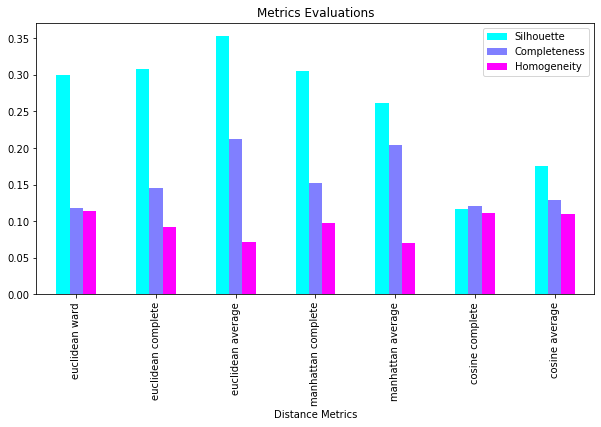

In [108]:
#outputs a plot of each metric in each clustering strategy
clust_ag.plot.bar(cmap = 'cool')
plt.title('Metrics Evaluations')
plt.xlabel('Distance Metrics')
plt.gcf().set_size_inches(10, 5)
plt.legend(loc = 'upper right')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Metrics Evaluation.png', bbox_inches='tight')
plt.show()


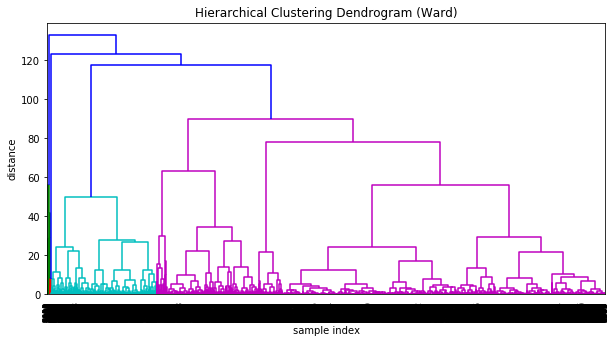

In [112]:
#outputs a dendrogram using agglomerative clustering using ward linkage
model = linkage(scaled_data, 'ward')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90, leaf_font_size=8)
plt.gcf().set_size_inches(10, 5)
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\cluster dendrogram ward.png', bbox_inches='tight')
plt.show()

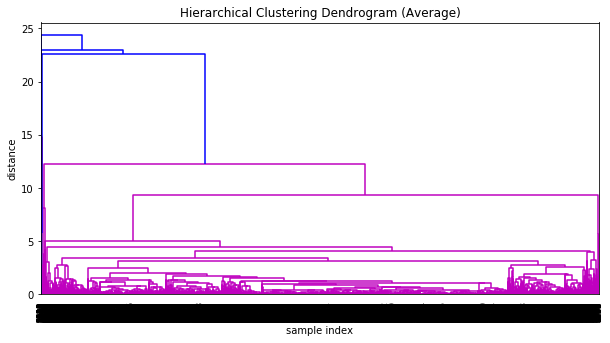

In [113]:
#outputs a dendrogram using agglomerative clustering using average linkage
model = linkage(scaled_data, 'average')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90, leaf_font_size=8)
plt.gcf().set_size_inches(10, 5)
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\cluster dendrogram average.png', bbox_inches='tight')
plt.show()        

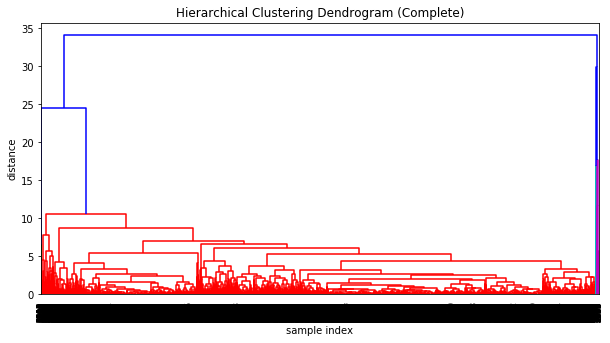

In [114]:
#outputs a dendrogram using agglomerative clustering using complete linkage
model = linkage(scaled_data, 'complete')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram (Complete)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90, leaf_font_size=8)
plt.gcf().set_size_inches(10, 5)
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\cluster dendrogram complete.png', bbox_inches='tight')
plt.show()  

In [115]:
#prints a dictionary of different metric scores for different number of clusters
kk ={}
for k in range(2, 50):     
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    ll = k
    mm = metrics.silhouette_score(scaled_data, kmeans.labels_)
    nn = metrics.completeness_score(y, kmeans.labels_)
    oo = metrics.homogeneity_score(y, kmeans.labels_)
    pp = {ll: [mm, nn, oo]}
    kk.update(pp)
print(kk)

{2: [0.478267786831086, 0.2729885458866698, 0.043737054430647765], 3: [0.4515850339825354, 0.26057587906492286, 0.04280628085380255], 4: [0.46210089988682, 0.26080191849136264, 0.04402064147827256], 5: [0.42548775672362205, 0.20095825538909276, 0.060380372488959666], 6: [0.4412040299685145, 0.15357631713416456, 0.06161909191833907], 7: [0.43846704057045005, 0.153329965670714, 0.06577415307218559], 8: [0.4412295312988951, 0.15424317814870944, 0.06651807711802939], 9: [0.3483537639439404, 0.1291448924081677, 0.06853580807048912], 10: [0.3626448178382743, 0.1364313148907644, 0.07479531067345992], 11: [0.35339577275381145, 0.1343660264578738, 0.07534185758441696], 12: [0.36094870975622423, 0.1294666970831784, 0.07888328940358554], 13: [0.36177769115321384, 0.12929292408296772, 0.07882853868254992], 14: [0.3363971344574994, 0.12175580200583837, 0.08214796732327265], 15: [0.3496711479826952, 0.12379425185215989, 0.08141497531954985], 16: [0.3480378072821501, 0.12456486437714978, 0.0858978416

In [116]:
#transforming dictionary kk to a data fram
k_clust = pd.DataFrame(data=kk)
k_clust

,2,3,4,5,6,7,8,9,10,11,...,40,41,42,43,44,45,46,47,48,49
0,0.478268,0.451585,0.462101,0.425488,0.441204,0.438467,0.441230,0.348354,0.362645,0.353396,...,0.320548,0.321964,0.325912,0.323046,0.323766,0.321743,0.322716,0.328234,0.322497,0.336409
1,0.272989,0.260576,0.260802,0.200958,0.153576,0.153330,0.154243,0.129145,0.136431,0.134366,...,0.116801,0.117806,0.119821,0.120368,0.121319,0.118091,0.119503,0.119578,0.119035,0.123536
2,0.043737,0.042806,0.044021,0.060380,0.061619,0.065774,0.066518,0.068536,0.074795,0.075342,...,0.122716,0.123536,0.127737,0.127847,0.130349,0.127457,0.130706,0.129986,0.133526,0.133869


In [117]:
##transposing columns so that metrics in the columns
clust_k = k_clust.transpose()
clust_k.columns = ['Silhouette', 'Completeness', 'Homogeneity']
clust_k

,Silhouette,Completeness,Homogeneity
2,0.478268,0.272989,0.043737
3,0.451585,0.260576,0.042806
4,0.462101,0.260802,0.044021
5,0.425488,0.200958,0.060380
6,0.441204,0.153576,0.061619
7,0.438467,0.153330,0.065774
8,0.441230,0.154243,0.066518
9,0.348354,0.129145,0.068536
10,0.362645,0.136431,0.074795
11,0.353396,0.134366,0.075342


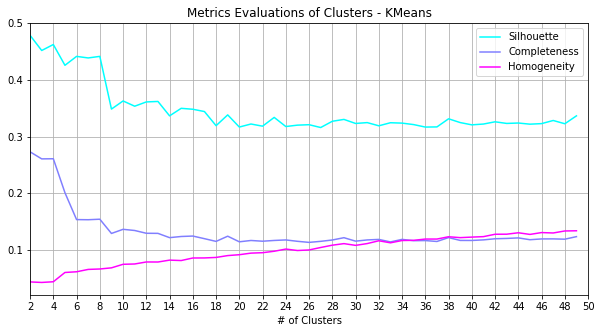

In [123]:
#outputs a line plot showing the change in metrics score as the number of clusters increases
clust_k.plot.line(cmap = 'cool', grid = True)
plt.title('Metrics Evaluations of Clusters - KMeans')
plt.xlabel('# of Clusters')
plt.gcf().set_size_inches(10, 5)
plt.legend(loc = 'upper right')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\kMetrics Evaluation.png', bbox_inches='tight')
plt.xticks(np.arange(2, 51, step=2))
plt.show()

In [220]:
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lg = LogisticRegression()

#define variabes for use in regression
variables = ['Category NUM', 'Reviews', 'Size', 'Installs', 'Price', 'Content Rating NUM']
v1 = 'Category NUM'
v2 = 'Reviews'
v3 = 'Size'
v4 = 'Installs'
v5 = 'Price'
v6 = 'Content Rating NUM'
x = playstore[[v2]]
x1 = playstore[variables]
y = playstore['Rating']

In [221]:
#simple linear regression, training and testing of model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.50)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
#predict our test model and print intercepts and coefficients
y_pred = lm.predict(x_test)
print(lm.intercept_)
print(lm.coef_)

4.166007555787607
[2.73285228e-08]


In [223]:
#observe length of y_test and y_pred
print(y_test.shape)
print(y_pred.shape)

(3862,)
(3862,)


In [224]:
#transform y_test and y_pred to an array
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

In [225]:
#put coefficient in a data frame for viewing
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Reviews,2.732852e-08


In [226]:
#outputs a data frame of actual vs predicted results
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,3.8,4.166315
1,4.4,4.166053
2,4.9,4.166008
3,3.2,4.166008
4,4.4,4.166008
...,...,...
3857,4.0,4.166013
3858,4.2,4.166148
3859,4.2,4.166120
3860,4.1,4.169741


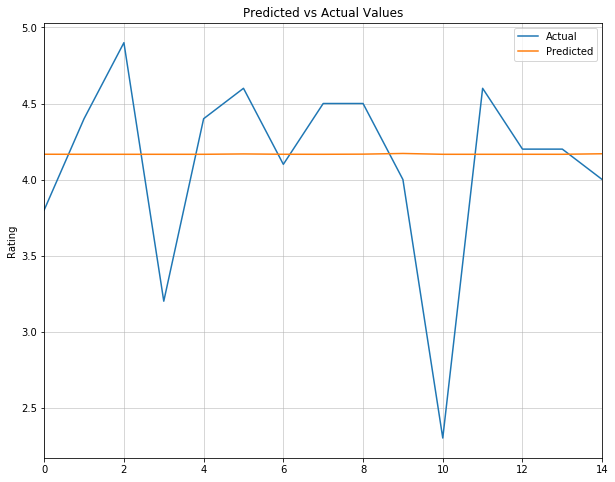

In [227]:
#outputs line chart of actual vs predicted results
df1 = df.head(15)
df1.plot(kind='line',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.title('Predicted vs Actual Values')
plt.ylabel('Rating')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Simple Pred vs Act.png', bbox_inches='tight')
plt.show()

In [228]:
#Prints performance results of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3849065381170453
Mean Squared Error: 0.29509101125307363
Root Mean Squared Error: 0.5432228007485268


In [229]:
#transform performance results to dictionary for transformation into data frame
performance = {'Mean Absolute Error': [metrics.mean_absolute_error(y_test, y_pred)], 
               'Mean Squared Error': [metrics.mean_squared_error(y_test, y_pred)],
              'Root Mean Squared Error': [metrics.mean_squared_error(y_test, y_pred)**0.5]}

In [230]:
performance

{'Mean Absolute Error': [0.3849065381170453],
 'Mean Squared Error': [0.29509101125307363],
 'Root Mean Squared Error': [0.5432228007485268]}

In [232]:
#transform performance dictionary to data frame
perf = pd.DataFrame(performance).transpose()
perf

,0
Mean Absolute Error,0.384907
Mean Squared Error,0.295091
Root Mean Squared Error,0.543223


In [233]:
#multiple linear regression, training and test model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x1, y, test_size = 0.50)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [234]:
#predict our test model and print intercepts and coefficients
y_pred1 = lm.predict(x_test)
print(lm.intercept_)
print(lm.coef_)

4.197917777181363
[-2.70078984e-03  2.32760719e-08  1.38284365e-03 -6.70131468e-11
 -1.02908899e-03 -2.74448454e-03]


In [235]:
#observe length of y_test and y_pred1
print(y_test.shape)
print(y_pred1.shape)

(3862,)
(3862,)


In [236]:
#transform y_test and y_pred1 to an array
y_test = np.array(list(y_test))
y_pred1 = np.array(y_pred1)

In [237]:
#put coefficients in a data frame for viewing
coeff_df1 = pd.DataFrame(lm.coef_, x1.columns, columns=['Coefficient'])  
coeff_df1

,Coefficient
Category NUM,-2.700790e-03
Reviews,2.327607e-08
Size,1.382844e-03
Installs,-6.701315e-11
Price,-1.029089e-03
Content Rating NUM,-2.744485e-03


In [238]:
#outputs a data frame of actual vs predicted results
mdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred1.flatten()})
mdf

,Actual,Predicted
0,4.3,4.139555
1,3.8,4.162901
2,4.6,4.156822
3,4.1,4.237957
4,2.4,4.222422
...,...,...
3857,4.3,4.195137
3858,4.6,4.197561
3859,4.3,4.215759
3860,4.1,4.136020


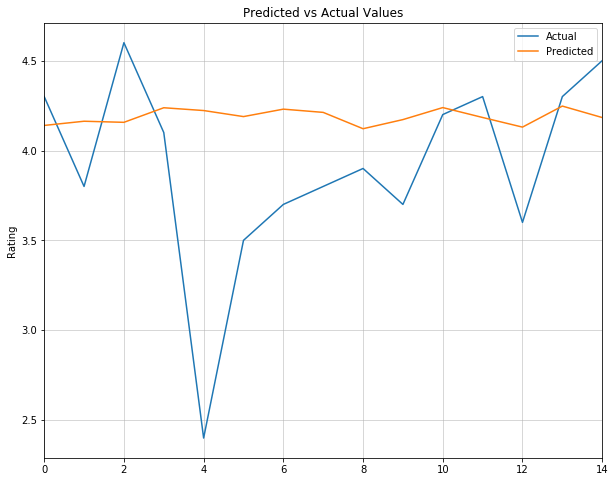

In [239]:
#outputs line chart of actual vs predicted results
mdf1 = mdf.head(15)
mdf1.plot(kind='line',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.title('Predicted vs Actual Values')
plt.ylabel('Rating')
plt.savefig('C:\\Users\\Inno Mvula\\Desktop\\Multi Pred vs Act.png', bbox_inches='tight')
plt.show()

In [240]:
#Prints performance results of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 0.38246759600807784
Mean Squared Error: 0.2939341164493837
Root Mean Squared Error: 0.5421569112806585


In [241]:
#transform performance results to dictionary for transformation into data frame
mperformance = {'Mean Absolute Error': [metrics.mean_absolute_error(y_test, y_pred1)], 
               'Mean Squared Error': [metrics.mean_squared_error(y_test, y_pred1)],
              'Root Mean Squared Error': [metrics.mean_squared_error(y_test, y_pred1)**0.5]}

In [242]:
mperformance

{'Mean Absolute Error': [0.38246759600807784],
 'Mean Squared Error': [0.2939341164493837],
 'Root Mean Squared Error': [0.5421569112806585]}

In [243]:
#transform performance dictionary to data frame
mperf = pd.DataFrame(mperformance).transpose()

In [244]:
mperf

,0
Mean Absolute Error,0.382468
Mean Squared Error,0.293934
Root Mean Squared Error,0.542157


In [245]:
import statsmodels.api as sm
from scipy import stats

In [246]:
#Outputs OLS regression Table of our Simple Regression Model
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     49.51
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.15e-12
Time:                        19:12:39   Log-Likelihood:                -6240.5
No. Observations:                7723   AIC:                         1.249e+04
Df Residuals:                    7721   BIC:                         1.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1671      0.006    666.200      0.0

C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [247]:
#Outputs OLS regression Table of our Multiple linear Regression Model
x3 = sm.add_constant(x1)
est = sm.OLS(y, x3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           5.44e-19
Time:                        19:14:01   Log-Likelihood:                -6216.0
No. Observations:                7723   AIC:                         1.245e+04
Df Residuals:                    7716   BIC:                         1.249e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1744      0

In [33]:
playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,7723.000000,7.723000e+03,7723.000000,7.723000e+03,7723.000000
mean,4.173935,2.948983e+05,22.970120,8.424070e+06,1.128169
std,0.544638,1.863933e+06,23.449949,5.015742e+07,17.408036
min,1.000000,1.000000e+00,0.008301,1.000000e+00,0.000000
25%,4.000000,1.075000e+02,5.300000,1.000000e+04,0.000000
50%,4.300000,2.332000e+03,14.000000,1.000000e+05,0.000000
75%,4.500000,3.905300e+04,33.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100.000000,1.000000e+09,400.000000
